In [189]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

%matplotlib inline

print('ready')

ready


In [190]:
sns.load_dataset('titanic')
df = sns.load_dataset('titanic')

In [191]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [192]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [242]:
bins = [0,10,25,40,65,85]
pd.cut(df.age, bins)

0      (10.0, 25.0]
1      (25.0, 40.0]
2      (25.0, 40.0]
3      (25.0, 40.0]
4      (25.0, 40.0]
           ...     
886    (25.0, 40.0]
887    (10.0, 25.0]
888             NaN
889    (25.0, 40.0]
890    (25.0, 40.0]
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, right]): [(0, 10] < (10, 25] < (25, 40] < (40, 65] < (65, 85]]

In [194]:
df['age_cat'] = pd.cut(df.age, bins=bins, labels=['child',
                                                 'teen',
                                                 'youth',
                                                 'adult',
                                                 'aged']) 

In [195]:
 B = pd.cut(df.age, bins)

In [196]:
B

0      (10.0, 25.0]
1      (25.0, 40.0]
2      (25.0, 40.0]
3      (25.0, 40.0]
4      (25.0, 40.0]
           ...     
886    (25.0, 40.0]
887    (10.0, 25.0]
888             NaN
889    (25.0, 40.0]
890    (25.0, 40.0]
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, right]): [(0, 10] < (10, 25] < (25, 40] < (40, 65] < (65, 85]]

In [197]:
for x in B.unique():
    print(x)

(10.0, 25.0]
(25.0, 40.0]
nan
(40.0, 65.0]
(0.0, 10.0]
(65.0, 85.0]


In [198]:
df['age_cat'] = pd.cut(df.age, bins=bins, labels=['child',
                                                 'teen',
                                                 'youth',
                                                 'adult',
                                                 'aged']) 

In [199]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,youth
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,youth


In [ ]:
# Practics Qs
1. Draw bar charts age_cat vs alive, sex, fare

2. Draw pie charts age_cat vs alive, sex, fare etc

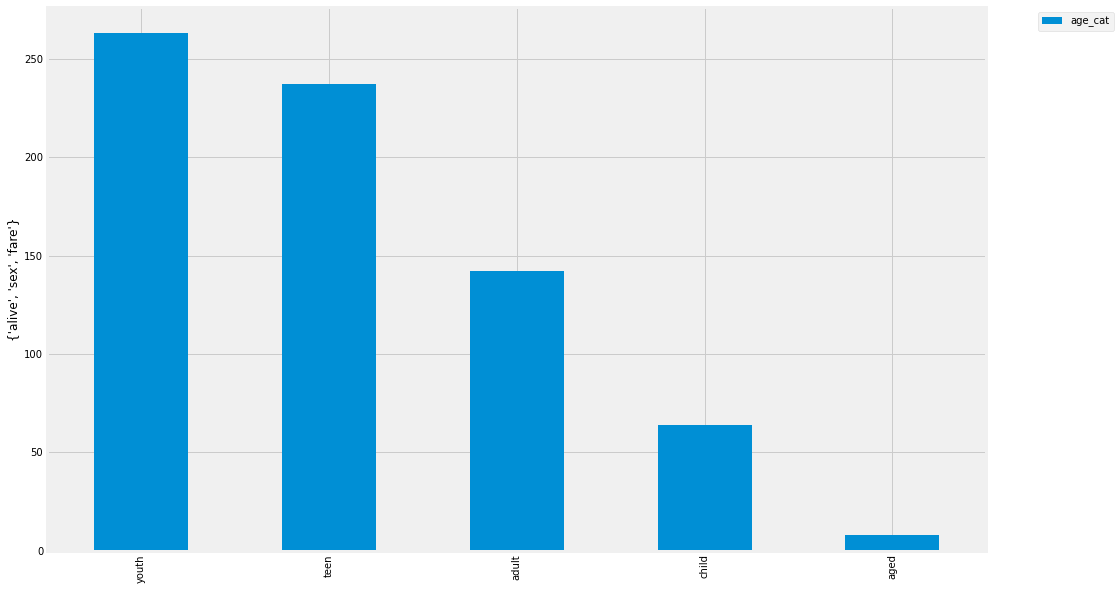

In [200]:
#Grouped bar chart
plt.rcParams["figure.figsize"] = (15, 10)
age_count.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel({'alive', 'sex', 'fare'})
height=0.8
weight=0.7

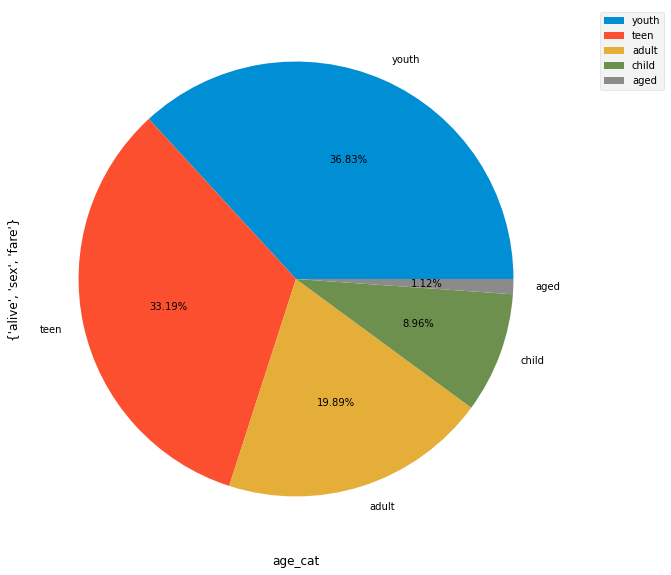

In [201]:
plt.rcParams["figure.figsize"] = (15, 10)
age_count.plot(kind='pie',autopct="%0.2f%%")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('age_cat')
plt.ylabel({'alive', 'sex', 'fare'})
height=0.8
weight=0.7

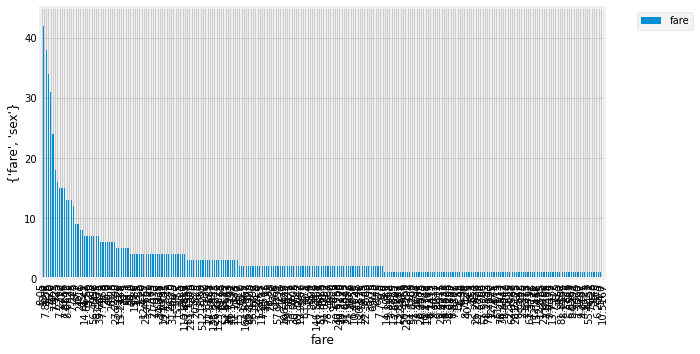

In [202]:
plt.rcParams["figure.figsize"] = (9, 5)
fare_count.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('fare')
plt.ylabel({'fare', 'sex'})
height=800
weight=1000

In [245]:
bins = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
pd.cut(df.value_counts(), bins)

survived  pclass  sex     age   sibsp  parch  fare      embarked  class  who    adult_male  deck  embark_town  alive  alone  age_cat
1         1       female  24.0  0      0      69.3000   C         First  woman  False       B     Cherbourg    yes    True   teen       NaN
                          58.0  0      0      26.5500   S         First  woman  False       C     Southampton  yes    True   adult      NaN
                          49.0  0      0      25.9292   S         First  woman  False       D     Southampton  yes    True   adult      NaN
                                1      0      76.7292   C         First  woman  False       D     Cherbourg    yes    False  adult      NaN
                          50.0  0      1      247.5208  C         First  woman  False       B     Cherbourg    yes    False  adult      NaN
                                                                                                                                       ... 
                          1

In [211]:
survived = df[df['survived'] == 1]
age_cat = df[df['survived'] == 0]
print('Analysis of survived')
print('{0} survived the wreck'.format(survived.shape[0]))
print('{0} did not survive the wreck'.format(age_cat.shape[0]))
survived_percent = round(((float(len(survived)/len(df))) * 100), 2)
age_cat_percent = round(((float(len(died)/len(df))) * 100), 2)
print('survived Percentage = {0} %'.format(survived_percent))
print('age_cat Percentage = {0} %'.format(age_cat_percent))

Analysis of survived
342 survived the wreck
549 did not survive the wreck
survived Percentage = 38.38 %
age_cat Percentage = 61.62 %


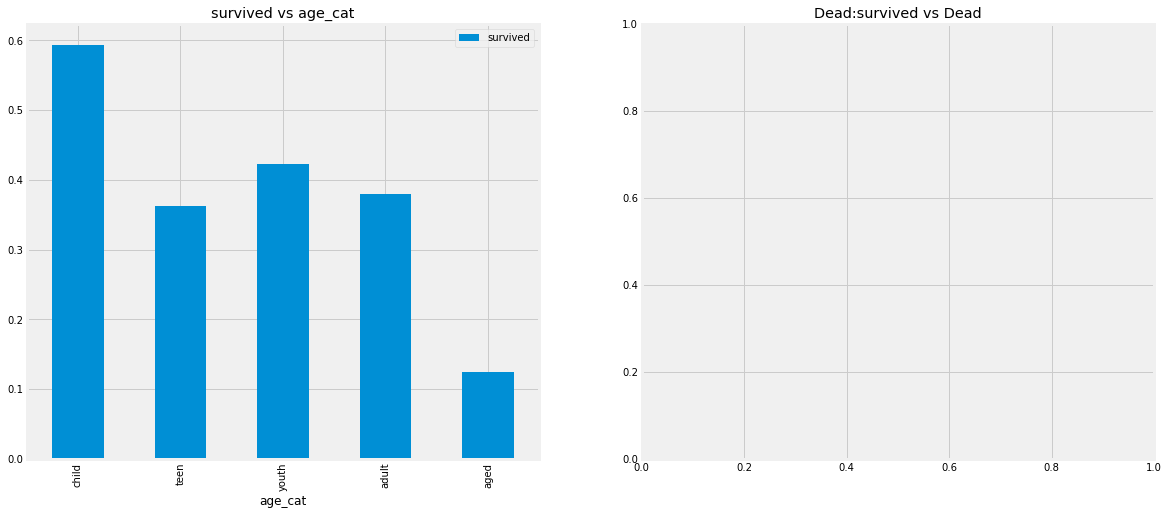

In [241]:
df.groupby(['survived','age_cat'])['survived'].count()
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['age_cat','survived']].groupby(['age_cat']).mean().plot.bar(ax=ax[0])
ax[0].set_title('survived vs age_cat')
#sns.countplot('Dead',hue='survived',df=df,ax=ax[1])
ax[1].set_title('Dead:survived vs Dead')
plt.show()